# **Modelado**

Montamos el disco de Google Drive e importamos librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Leemos el dataset listo para entrenar el modelo

In [ ]:
ROOT = '/content/drive/Othercomputers/Mi MacBook Pro/Google Drive/tp2/'
dataSetPath = './data/smoking_prediction_prepared.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(ROOT + dataSetPath)
df.head()

,gender,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,3.38,4.75,3.04,3.92,8.96,3.42,3.04,5.25,0.51,0.04,0.75,0.79,1.13,0,1,0
1,0,40,160,60,3.38,4.96,2.92,5.42,8.00,4.79,1.75,5.29,0.50,0.04,0.92,0.79,0.75,0,1,0
2,1,55,170,60,3.33,5.75,3.58,3.71,10.08,7.58,2.29,6.29,0.63,0.04,0.88,0.67,0.92,0,0,1
3,1,40,165,70,3.67,4.17,2.50,4.00,13.42,10.58,1.88,9.42,0.59,0.04,0.79,1.08,0.75,0,1,0
4,0,40,155,60,3.58,5.00,3.08,3.33,7.67,3.08,2.58,4.46,0.50,0.04,0.67,0.58,0.92,0,0,0


Definimos una función para los reportes

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

def report(y_train, train_pred, y_test, test_pred, y_validate, validate_pred, model=False):
  fig, axes = plt.subplots(1, 3, figsize=(30, 5))
  print("Train")
  print(classification_report(y_train, train_pred))
  print("----------------------------------------------------------")
  print("Test")
  print(classification_report(y_test, test_pred))
  print("----------------------------------------------------------")
  print("Validate")
  print(classification_report(y_validate, validate_pred))

  axes[0].set_title('Training')
  axes[1].set_title('Test')
  axes[2].set_title('Validate')

  cm_train = confusion_matrix(y_train, train_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm_train).plot(ax=axes[0])

  cm_test = confusion_matrix(y_test, test_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm_test).plot(ax=axes[1])

  cm_validate = confusion_matrix(y_validate, validate_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm_validate).plot(ax=axes[2])

  if model:
    y_train_proba = model.predict_proba(X_train)[:,1]
    y_test_proba = model.predict_proba(X_test)[:,1]
    y_validate_proba = model.predict_proba(X_validate)[:,1]

    plt.figure(figsize=(9,5))
    sns.histplot(y_train_proba, bins=100, kde=True, label="Train", stat="density", alpha=0.7)
    sns.histplot(y_test_proba, bins=100, kde=True, label="Test", stat="density", alpha=0.5)
    sns.histplot(y_validate_proba, bins=100, kde=True, label="Validate", stat="density", alpha=0.3)
    plt.axvline(0.5, color="red", linestyle="--")
    plt.xlabel("probabilidad")
    plt.ylabel("density")
    plt.legend()
    plt.grid(True)
    plt.show()

Definimos una constante para la semilla random state

In [ ]:
SEED = 42

Separamos los datos de la variable objetivo

In [ ]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

Previsualizamos las variables

In [ ]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,40.0,155.0,60.0,3.38,4.75,3.04,3.92,8.96,3.42,3.04,5.25,0.51,0.04,0.75,0.79,1.13,0.0,1.0
1,0.0,40.0,160.0,60.0,3.38,4.96,2.92,5.42,8.00,4.79,1.75,5.29,0.50,0.04,0.92,0.79,0.75,0.0,1.0
2,1.0,55.0,170.0,60.0,3.33,5.75,3.58,3.71,10.08,7.58,2.29,6.29,0.63,0.04,0.88,0.67,0.92,0.0,0.0
3,1.0,40.0,165.0,70.0,3.67,4.17,2.50,4.00,13.42,10.58,1.88,9.42,0.59,0.04,0.79,1.08,0.75,0.0,1.0
4,0.0,40.0,155.0,60.0,3.58,5.00,3.08,3.33,7.67,3.08,2.58,4.46,0.50,0.04,0.67,0.58,0.92,0.0,0.0


In [ ]:
pd.DataFrame(y).head()

,0
0,0
1,0
2,1
3,0
4,0


Separamos los datos de entrenamiento y testing de la siguiente manera:

- 80% Training
- 10% Testing
- 10% Validación

Realizamos un oversample para balancear los datos.

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=.20, random_state=SEED, stratify=y_resampled)
#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=.20, random_state=SEED, stratify=y)
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=SEED, stratify=y_temp)


Normalizamos el set de datos

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_validate = scaler.transform(X_validate)

Entrenamos los diferentes modelos y vemos sus respectivos reportes

# **Árbol de decisión**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, random_state=SEED)

dtc_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, random_state=42)

*Predicciones:*

In [ ]:
train_pred = dtc_model.predict(X_train)
test_pred = dtc_model.predict(X_test)
validate_pred = dtc_model.predict(X_validate)

Ejecutamos el reporte

Train
              precision    recall  f1-score   support

           0       0.88      0.66      0.75     25336
           1       0.73      0.91      0.81     25337

    accuracy                           0.78     50673
   macro avg       0.80      0.78      0.78     50673
weighted avg       0.80      0.78      0.78     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.86      0.64      0.73      3168
           1       0.71      0.90      0.79      3167

    accuracy                           0.77      6335
   macro avg       0.79      0.77      0.76      6335
weighted avg       0.79      0.77      0.76      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.85      0.64      0.73      3167
           1       0.71      0.88      0.79      3167

    accuracy                           0.76 

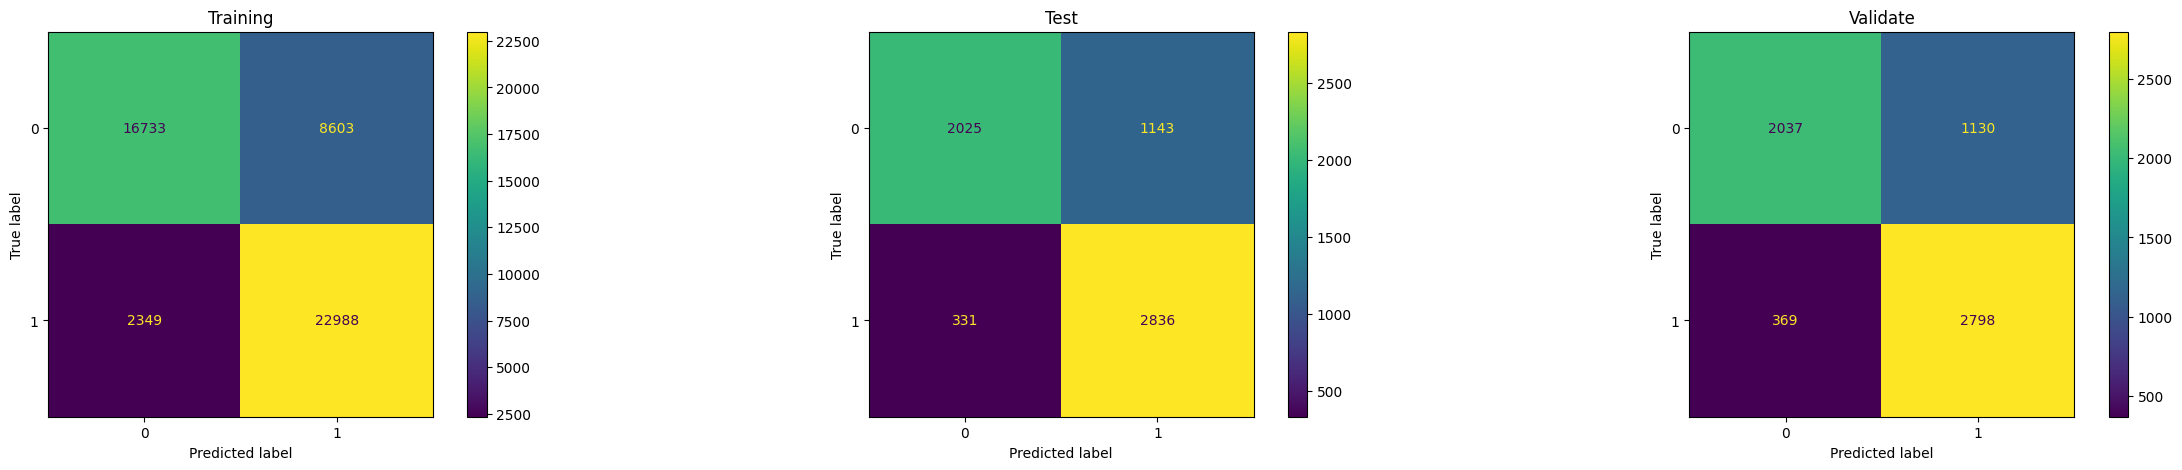

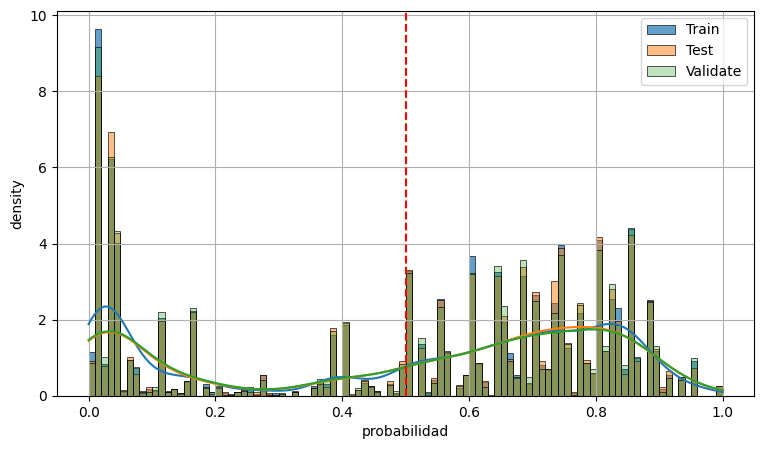

In [ ]:
report(y_train, train_pred, y_test, test_pred, y_validate, validate_pred, dtc_model)

Ajustamos el umbral al porcentaje de la variable mayoritaria, 63%

Train
              precision    recall  f1-score   support

           0       0.76      0.79      0.77     25336
           1       0.78      0.75      0.76     25337

    accuracy                           0.77     50673
   macro avg       0.77      0.77      0.77     50673
weighted avg       0.77      0.77      0.77     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      3168
           1       0.75      0.74      0.74      3167

    accuracy                           0.74      6335
   macro avg       0.74      0.74      0.74      6335
weighted avg       0.74      0.74      0.74      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      3167
           1       0.75      0.73      0.74      3167

    accuracy                           0.75 

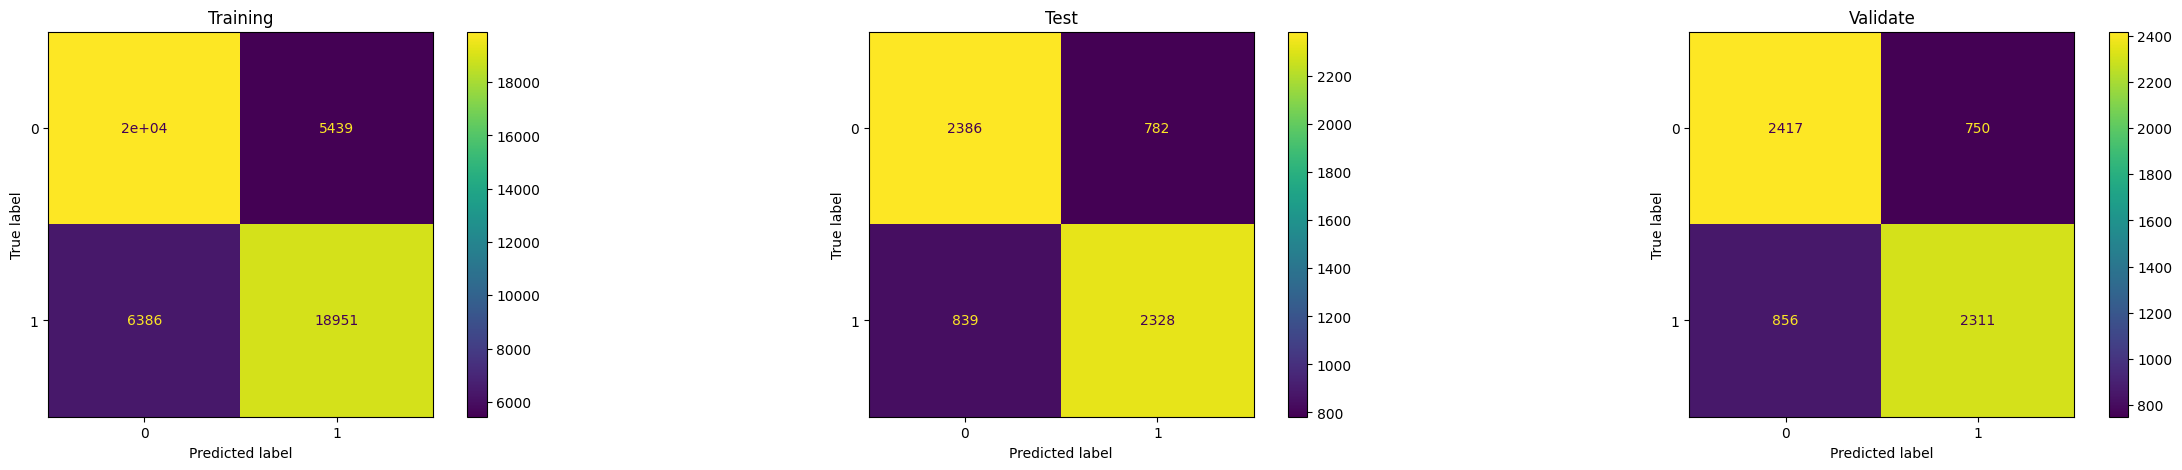

In [ ]:
threshold = 0.63
model = dtc_model

y_train_proba = model.predict_proba(X_train)[:,1]
y_test_proba = model.predict_proba(X_test)[:,1]
y_validate_proba = model.predict_proba(X_validate)[:,1]

train_pred_custom = (y_train_proba >= threshold).astype(int)
test_pred_custom = (y_test_proba >= threshold).astype(int)
validate_pred_custom = (y_validate_proba >= threshold).astype(int)

report(y_train, train_pred_custom, y_test, test_pred_custom, y_validate, validate_pred_custom)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=150)

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=150)

*Predicciones:*

In [ ]:
train_pred = knn_model.predict(X_train)
test_pred = knn_model.predict(X_test)
validate_pred = knn_model.predict(X_validate)

Ejecutamos el reporte

Train
              precision    recall  f1-score   support

           0       0.89      0.60      0.72     25336
           1       0.70      0.92      0.80     25337

    accuracy                           0.76     50673
   macro avg       0.79      0.76      0.76     50673
weighted avg       0.79      0.76      0.76     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.88      0.59      0.70      3168
           1       0.69      0.92      0.79      3167

    accuracy                           0.75      6335
   macro avg       0.79      0.75      0.75      6335
weighted avg       0.79      0.75      0.75      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.89      0.61      0.72      3167
           1       0.70      0.92      0.80      3167

    accuracy                           0.76 

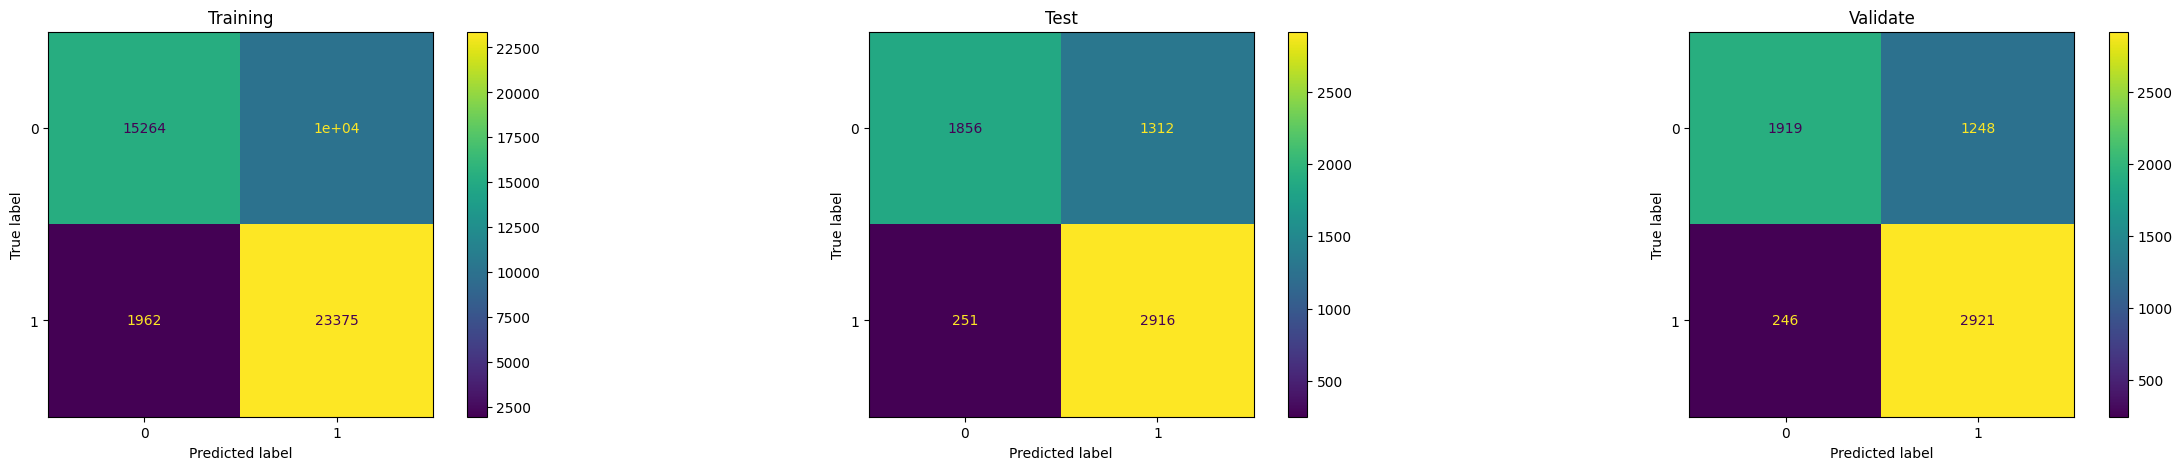

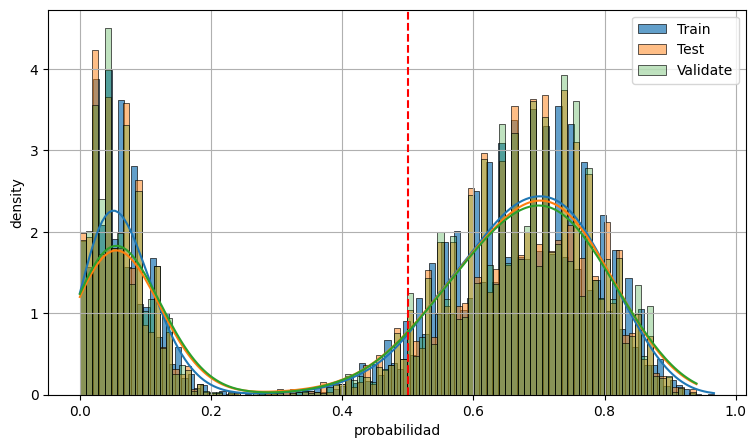

In [ ]:
report(y_train, train_pred, y_test, test_pred, y_validate, validate_pred, knn_model)

Ajustamos el umbral al porcentaje de la variable mayoritaria, 63%

Train
              precision    recall  f1-score   support

           0       0.73      0.76      0.75     25336
           1       0.75      0.72      0.73     25337

    accuracy                           0.74     50673
   macro avg       0.74      0.74      0.74     50673
weighted avg       0.74      0.74      0.74     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      3168
           1       0.74      0.72      0.73      3167

    accuracy                           0.73      6335
   macro avg       0.73      0.73      0.73      6335
weighted avg       0.73      0.73      0.73      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      3167
           1       0.75      0.72      0.73      3167

    accuracy                           0.74 

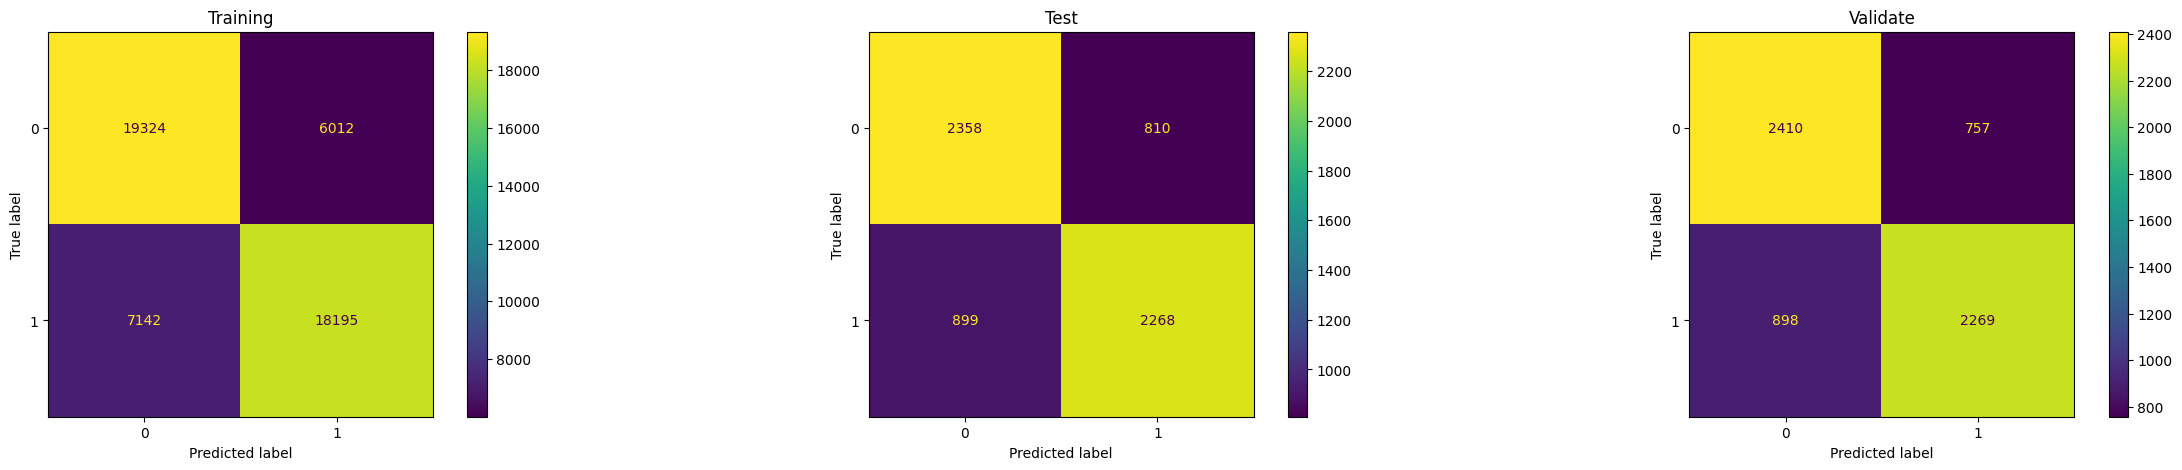

In [ ]:
threshold = 0.63
model = knn_model

y_train_proba = model.predict_proba(X_train)[:,1]
y_test_proba = model.predict_proba(X_test)[:,1]
y_validate_proba = model.predict_proba(X_validate)[:,1]

train_pred_custom = (y_train_proba >= threshold).astype(int)
test_pred_custom = (y_test_proba >= threshold).astype(int)
validate_pred_custom = (y_validate_proba >= threshold).astype(int)

report(y_train, train_pred_custom, y_test, test_pred_custom, y_validate, validate_pred_custom)

# **XG-Boost**

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(n_estimators=550, max_leaves=0, max_depth=2, random_state=SEED)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=0, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=550,
              n_jobs=None, num_parallel_tree=None, ...)

*Predicciones:*

In [ ]:
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)
validate_pred = xgb_model.predict(X_validate)

Ejecutamos el reporte

Train
              precision    recall  f1-score   support

           0       0.86      0.70      0.77     25336
           1       0.75      0.89      0.81     25337

    accuracy                           0.79     50673
   macro avg       0.81      0.79      0.79     50673
weighted avg       0.81      0.79      0.79     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      3168
           1       0.73      0.88      0.79      3167

    accuracy                           0.77      6335
   macro avg       0.79      0.77      0.77      6335
weighted avg       0.79      0.77      0.77      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      3167
           1       0.74      0.88      0.80      3167

    accuracy                           0.78 

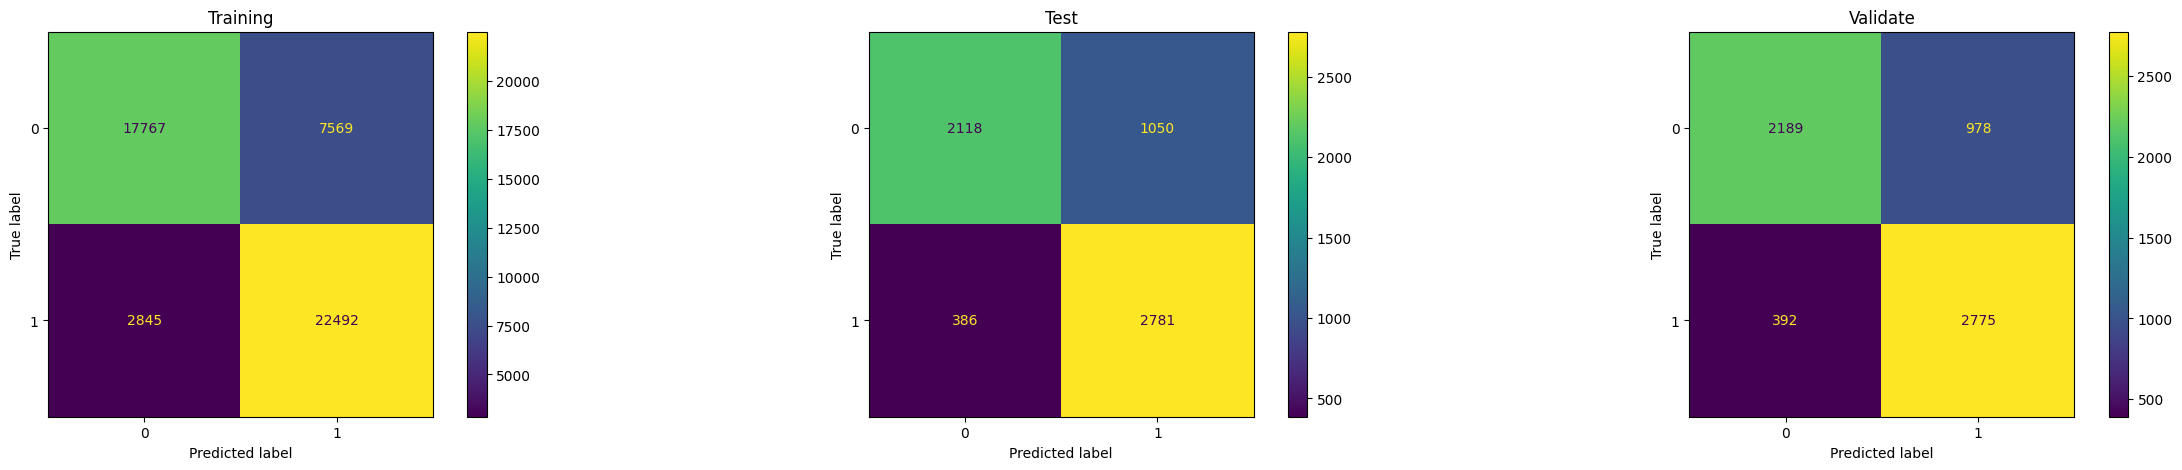

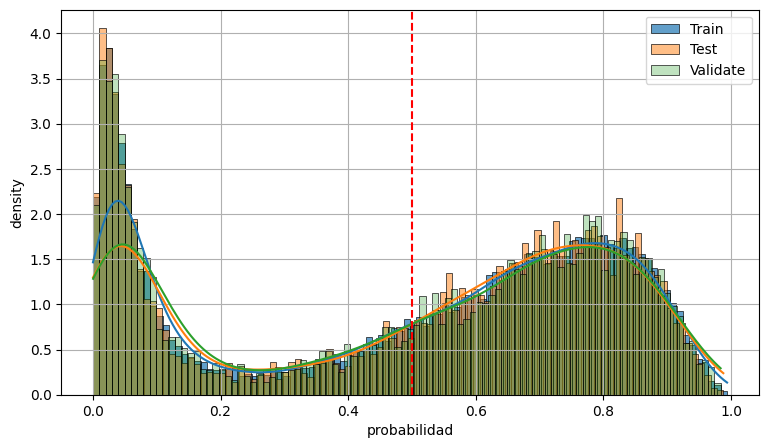

In [ ]:
report(y_train, train_pred, y_test, test_pred, y_validate, validate_pred, xgb_model)

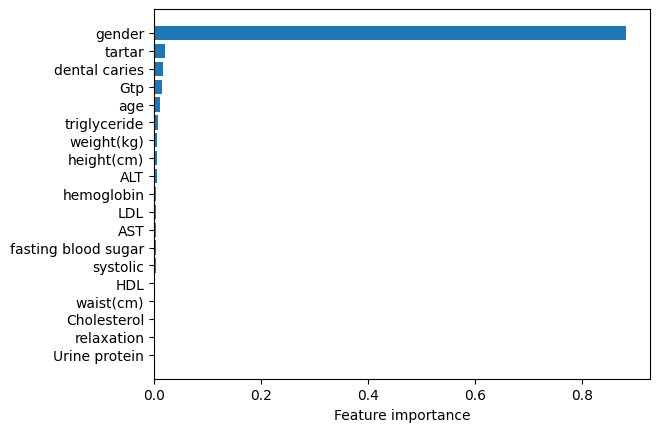

In [ ]:
sorted_idx = xgb_model.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], xgb_model.feature_importances_[sorted_idx])
plt.xlabel("Feature importance")
plt.show()

Ajustamos el umbral al porcentaje de la variable mayoritaria, 63%

Train
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     25336
           1       0.80      0.75      0.77     25337

    accuracy                           0.78     50673
   macro avg       0.78      0.78      0.78     50673
weighted avg       0.78      0.78      0.78     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      3168
           1       0.78      0.73      0.75      3167

    accuracy                           0.76      6335
   macro avg       0.76      0.76      0.76      6335
weighted avg       0.76      0.76      0.76      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      3167
           1       0.78      0.73      0.75      3167

    accuracy                           0.76 

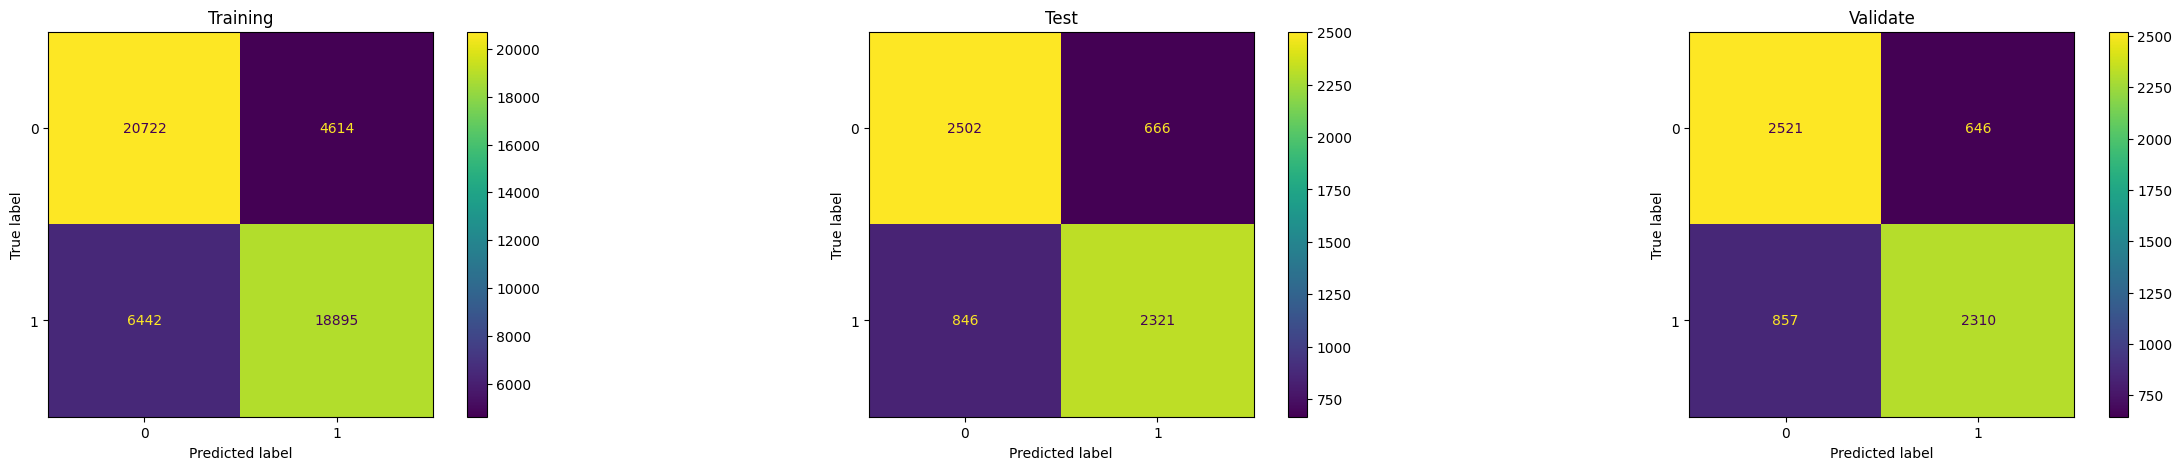

In [ ]:
threshold = 0.63
model = xgb_model

y_train_proba = model.predict_proba(X_train)[:,1]
y_test_proba = model.predict_proba(X_test)[:,1]
y_validate_proba = model.predict_proba(X_validate)[:,1]

train_pred_custom = (y_train_proba >= threshold).astype(int)
test_pred_custom = (y_test_proba >= threshold).astype(int)
validate_pred_custom = (y_validate_proba >= threshold).astype(int)

report(y_train, train_pred_custom, y_test, test_pred_custom, y_validate, validate_pred_custom)

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=900, max_samples=2500, min_samples_split=3, random_state=SEED)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_samples=2500, min_samples_split=3, n_estimators=900,
                       random_state=42)

Realizamos predicciones

In [ ]:
train_pred = rf_model.predict(X_train)
test_pred = rf_model.predict(X_test)
validate_pred = rf_model.predict(X_validate)

Ejecutamos el reporte

Train
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     25336
           1       0.74      0.94      0.83     25337

    accuracy                           0.80     50673
   macro avg       0.83      0.80      0.80     50673
weighted avg       0.83      0.80      0.80     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.90      0.63      0.74      3168
           1       0.71      0.93      0.81      3167

    accuracy                           0.78      6335
   macro avg       0.81      0.78      0.77      6335
weighted avg       0.81      0.78      0.77      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.89      0.65      0.75      3167
           1       0.72      0.92      0.81      3167

    accuracy                           0.78 

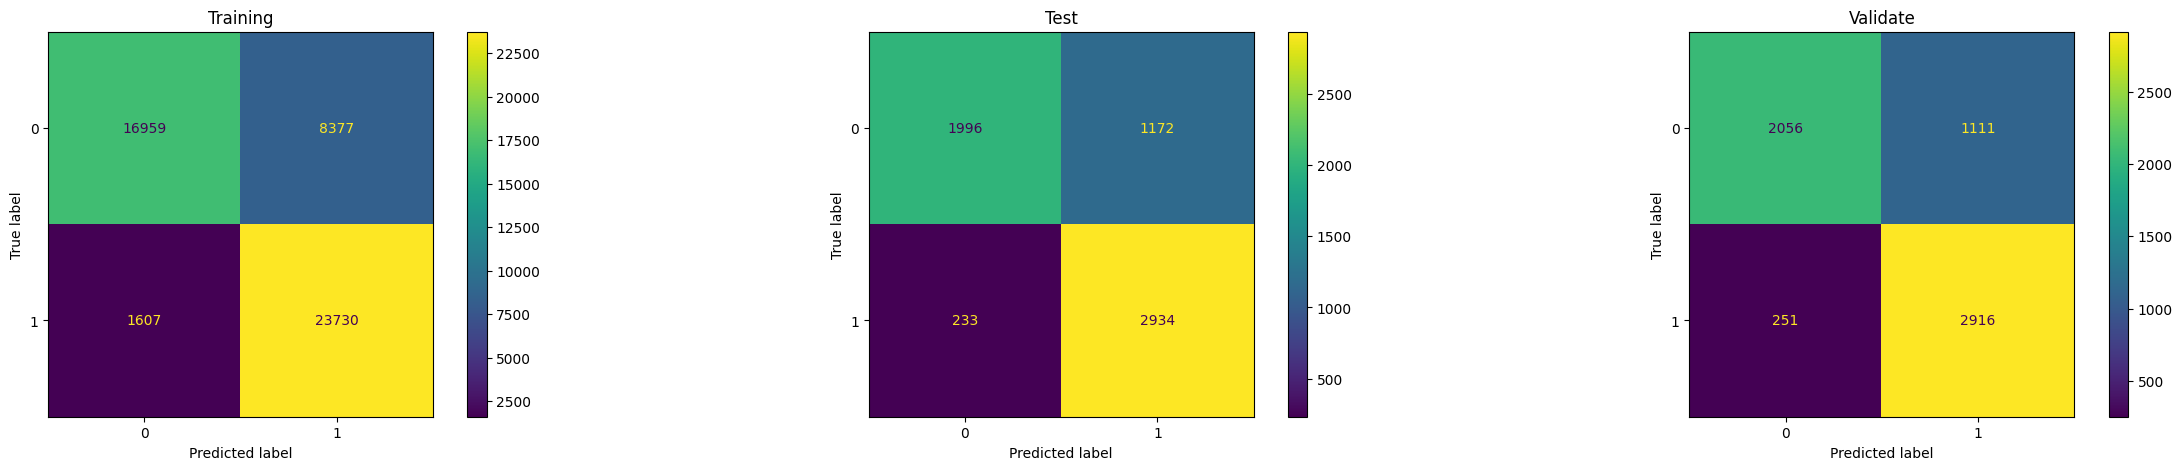

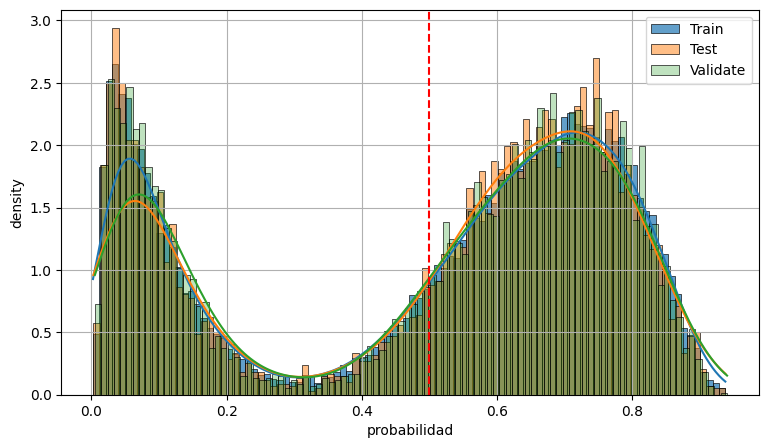

In [ ]:
report(y_train, train_pred, y_test, test_pred, y_validate, validate_pred, rf_model)

Ajustamos el umbral al porcentaje de la variable mayoritaria, 63%

Train
              precision    recall  f1-score   support

           0       0.78      0.86      0.82     25336
           1       0.84      0.76      0.80     25337

    accuracy                           0.81     50673
   macro avg       0.81      0.81      0.81     50673
weighted avg       0.81      0.81      0.81     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.74      0.81      0.78      3168
           1       0.79      0.72      0.76      3167

    accuracy                           0.77      6335
   macro avg       0.77      0.77      0.77      6335
weighted avg       0.77      0.77      0.77      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.75      0.82      0.78      3167
           1       0.80      0.72      0.76      3167

    accuracy                           0.77 

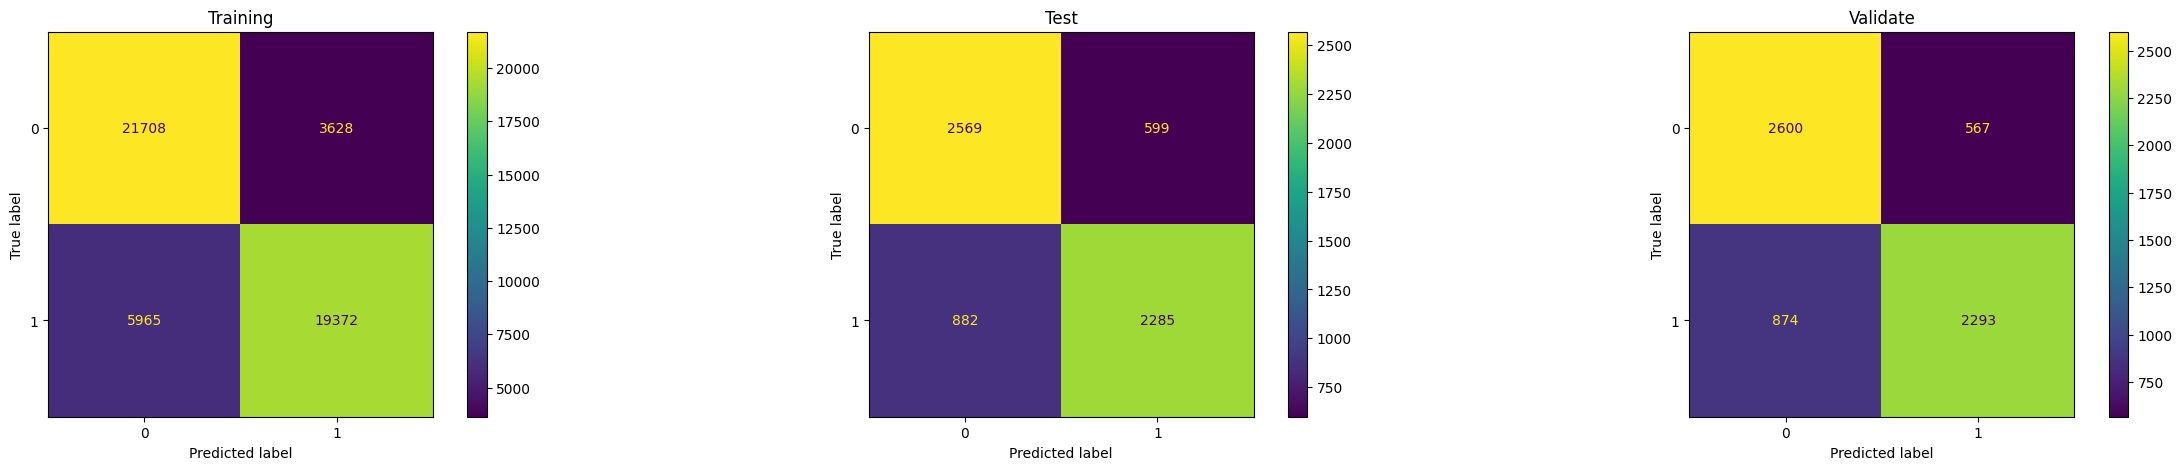

In [ ]:
threshold = 0.63
model = rf_model

y_train_proba = model.predict_proba(X_train)[:,1]
y_test_proba = model.predict_proba(X_test)[:,1]
y_validate_proba = model.predict_proba(X_validate)[:,1]

train_pred_custom = (y_train_proba >= threshold).astype(int)
test_pred_custom = (y_test_proba >= threshold).astype(int)
validate_pred_custom = (y_validate_proba >= threshold).astype(int)

report(y_train, train_pred_custom, y_test, test_pred_custom, y_validate, validate_pred_custom)

# **Regresión Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=500, random_state=SEED)

lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

*Predicciones:*

In [ ]:
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)
validate_pred = lr_model.predict(X_validate)

*Reporte:*

Train
              precision    recall  f1-score   support

           0       0.89      0.60      0.71     25336
           1       0.70      0.93      0.79     25337

    accuracy                           0.76     50673
   macro avg       0.79      0.76      0.75     50673
weighted avg       0.79      0.76      0.75     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.90      0.59      0.71      3168
           1       0.69      0.93      0.80      3167

    accuracy                           0.76      6335
   macro avg       0.80      0.76      0.75      6335
weighted avg       0.80      0.76      0.75      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.89      0.60      0.72      3167
           1       0.70      0.93      0.80      3167

    accuracy                           0.76 

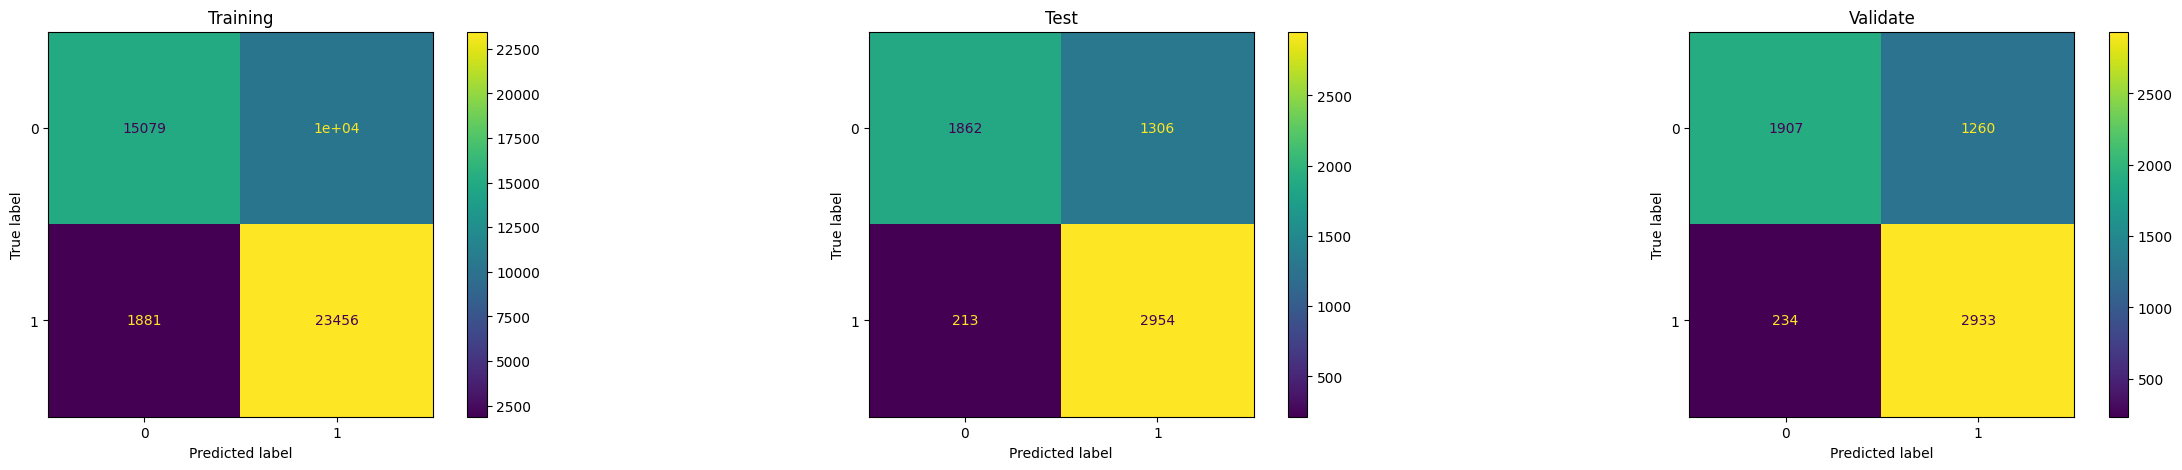

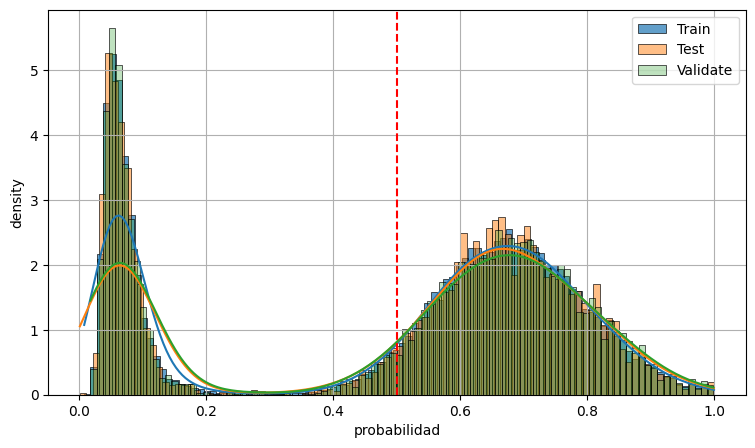

In [ ]:
report(y_train, train_pred, y_test, test_pred, y_validate, validate_pred, lr_model)

Ajustamos el umbral al porcentaje de la variable mayoritaria, 63%

Train
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     25336
           1       0.75      0.70      0.72     25337

    accuracy                           0.73     50673
   macro avg       0.73      0.73      0.73     50673
weighted avg       0.73      0.73      0.73     50673

----------------------------------------------------------
Test
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      3168
           1       0.74      0.70      0.72      3167

    accuracy                           0.73      6335
   macro avg       0.73      0.73      0.73      6335
weighted avg       0.73      0.73      0.73      6335

----------------------------------------------------------
Validate
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      3167
           1       0.75      0.70      0.72      3167

    accuracy                           0.73 

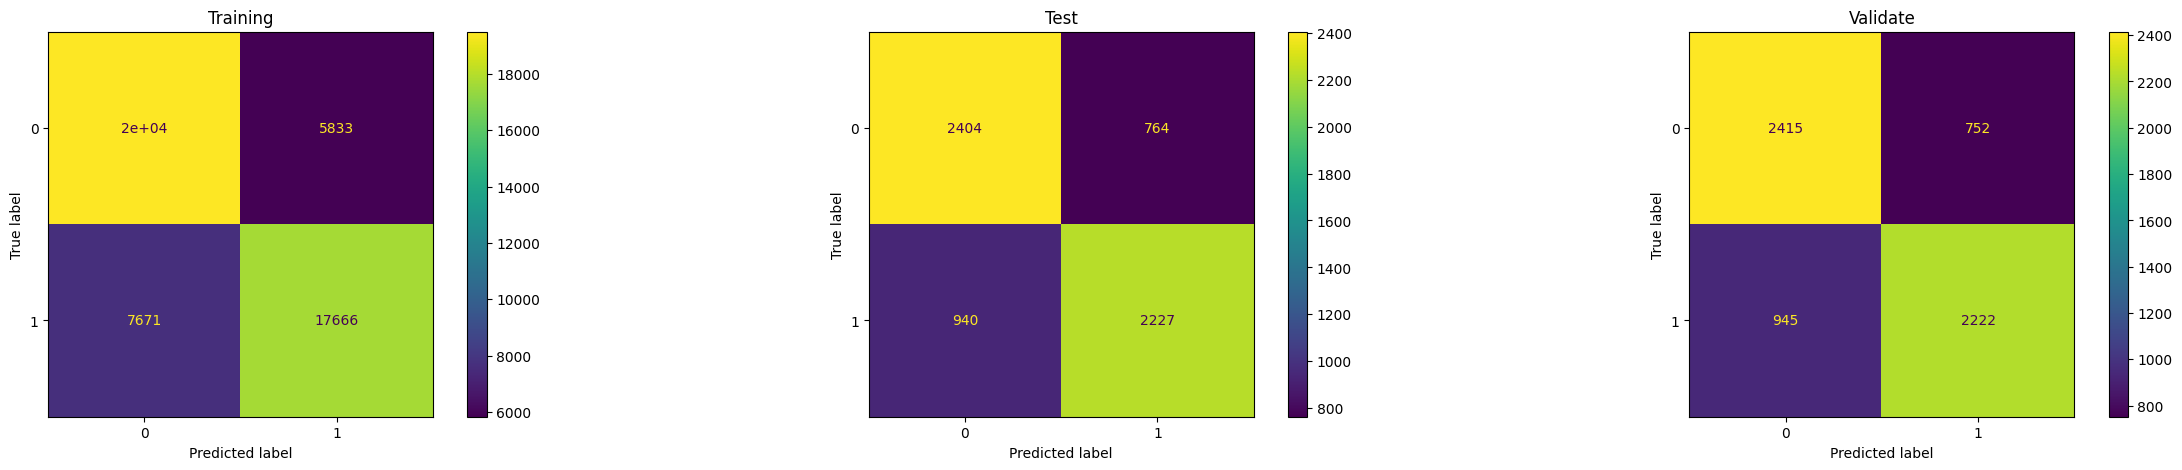

In [ ]:
threshold = 0.63
model = lr_model

y_train_proba = model.predict_proba(X_train)[:,1]
y_test_proba = model.predict_proba(X_test)[:,1]
y_validate_proba = model.predict_proba(X_validate)[:,1]

train_pred_custom = (y_train_proba >= threshold).astype(int)
test_pred_custom = (y_test_proba >= threshold).astype(int)
validate_pred_custom = (y_validate_proba >= threshold).astype(int)

report(y_train, train_pred_custom, y_test, test_pred_custom, y_validate, validate_pred_custom)

# **Conclusiones**

Los dos mejores modelos, según su performance general fueron Random Forest y XG Boost.

- Random Forest: 0.78 - 0.80
- XG Boost: 0.77 - 0.79

Por la presición en la variable objetivo, teniendo en cuenta el recall, se tuvo mejor performance en Random Forest:

- Random Forest: Presición 0.72 - 0.74 | Recall: 0.92 - 0.94
- XG Boost: Presición 0.73 - 0.75 | Recall: 0.88 - 0.89

Con estos datos se selecciona el modelo de Random Forest.

Exportamos el modelo seleccionado

In [38]:
import joblib
from sklearn.pipeline import Pipeline

model = rf_model

pipe = Pipeline([
    ('scaler', scaler),
    ('clf', model)
])

joblib.dump(pipe, ROOT + 'models/pipeline.joblib')
joblib.dump(dtc_model, ROOT + 'models/decision_tree.joblib')
joblib.dump(knn_model, ROOT + 'models/knn.joblib')
joblib.dump(xgb_model, ROOT + 'models/xgboost.joblib')
joblib.dump(rf_model, ROOT + 'models/random_forest.joblib')
joblib.dump(lr_model, ROOT + 'models/logistic_regression.joblib')
joblib.dump(scaler, ROOT + 'scalers/minMaxScaler.joblib')

['/content/drive/Othercomputers/Mi MacBook\xa0Pro/Google Drive/tp2/scalers/minMaxScaler.joblib']